<center><h1>Housing Price Prediction(Boston Dataset)</h1></center>

<h4>
    Prerequisite Installations
</h4>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install streamlit pandas numpy joblib scikit-learn seaborn math

ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


In [3]:
%autosave 10

Autosaving every 10 seconds


- The following file contains machine learning model(s) which are created using Scikit learn library. These models can be used to predict prices of houses based upon certain criteria which are taken as their inputs and given out as their outputs.
- The dataset used is based on the 'Boston Housing dataset' available on kaggle.
- Boston : <href>https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset</href>

In [4]:
# Importing Necessary python Libraries and Dependancies.
import os
import joblib
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<h2>Phase One : Data Collection</h2>

In [5]:
dataset_link = 'https://raw.githubusercontent.com/bishnu9009/Popular-ML-Datasets/main/boston_housing.csv'

In [6]:
# Creation of DataFrame from our dataset using Pandas library.

# boston_df = pd.read_csv('./BostonHousing.csv')     # Uncomment this line if you have the dataset locally downloaded and make sure to use the same file
                                                     # name as that of your downlaoded dataset.
boston_df = pd.read_csv(dataset_link)

In [7]:
# Displaying the two datasets.
print("Boston Housing Dataset first 10 Entries:\n")
display(boston_df.head(10))

Boston Housing Dataset first 10 Entries:



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


<h2> Phase Two : EDA On the Dataset </h2>

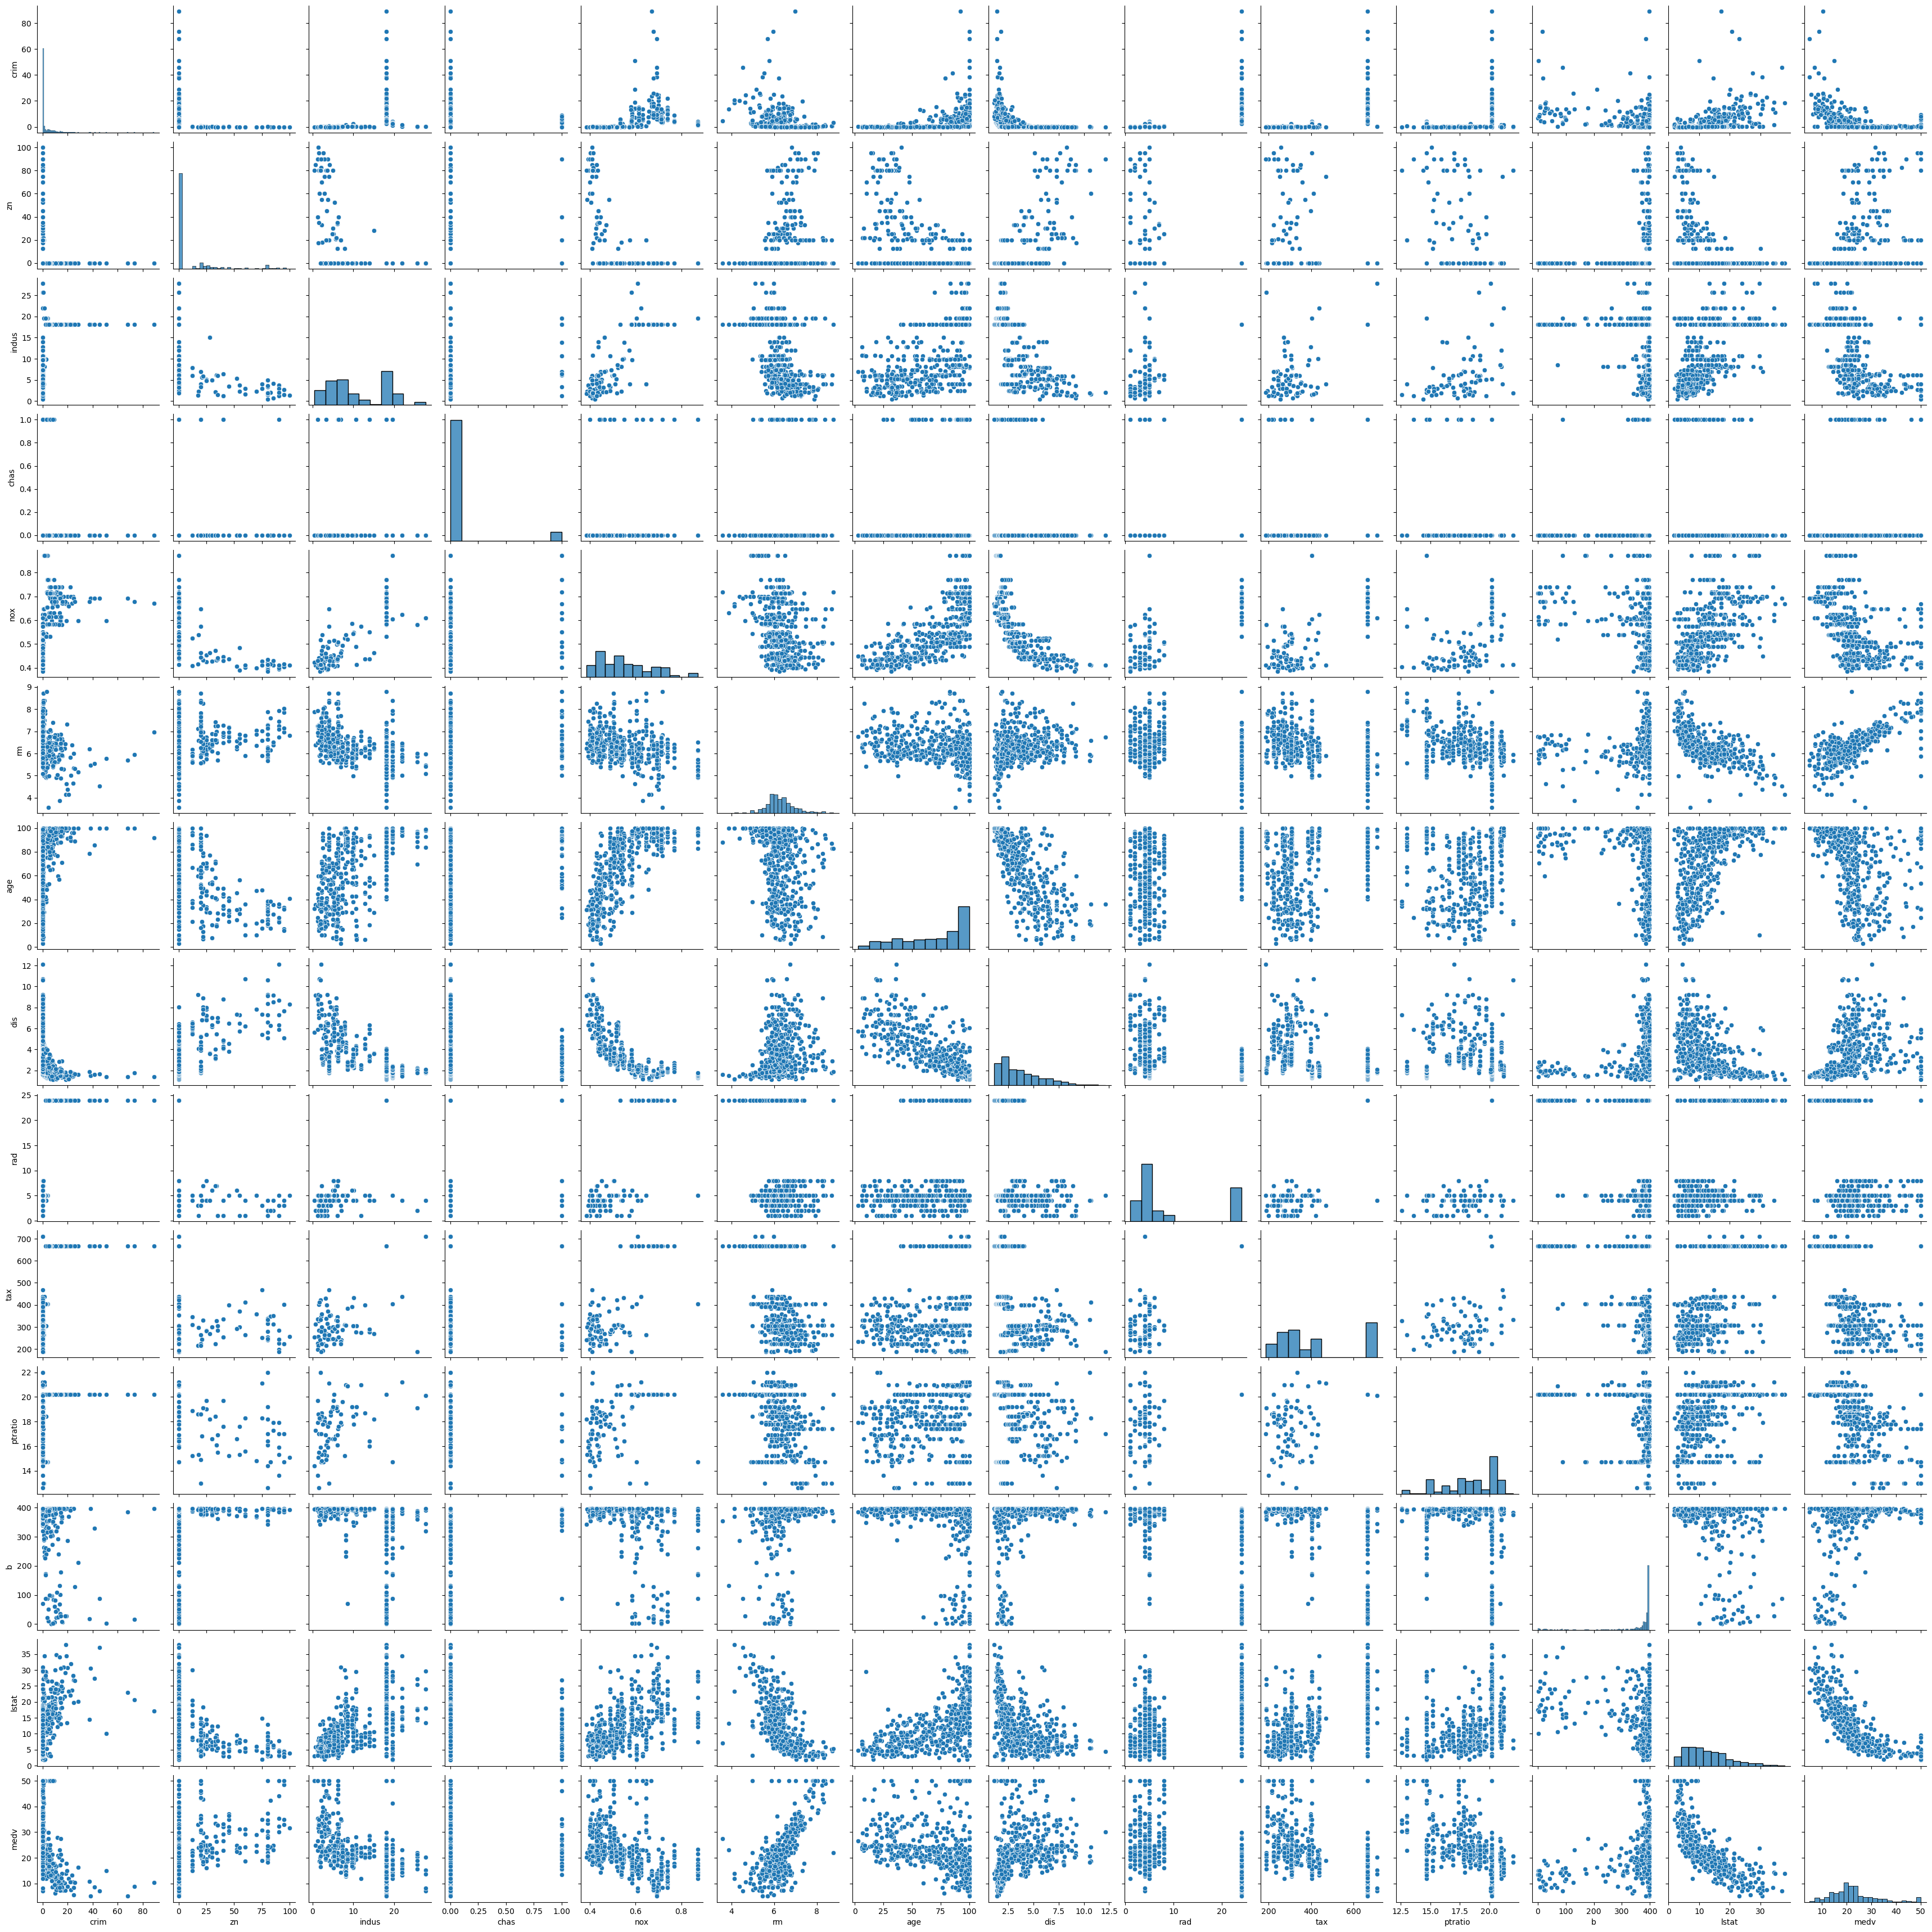

In [8]:
sns.pairplot(boston_df)

<Axes: >

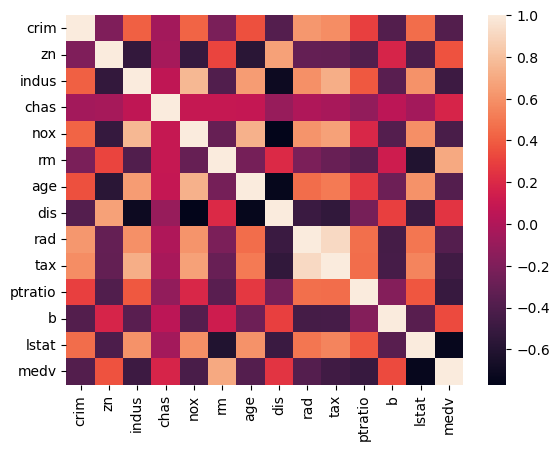

In [9]:
correlation_matrix = boston_df.select_dtypes('number').corr()
sns.heatmap(correlation_matrix)

In [10]:
print(correlation_matrix['medv'])

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.696169
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64


- From the above heatmap and corelation values of different columns with our intended output column of 'medv' we can see that some variables have positive and some variables have negetive corelations.
- A negetive corelation denotes that the two fields/attributes are inversely related. i.e increase in one will lead to decrease in other. So in this example if 'lstat' column is high then the overall 'medv' value will be low.
- A positive corelation is the oppposite of a negetive corelation. i.e in our above case 'rm' column has a higher impact on the 'medv' hence increase in 'rm' increases 'medv' and vice-versa.

In [11]:
# Checking for descriptive statistics of both datasets
print("Descriptive Stats about Boston DF : \n")
display(boston_df.describe())

Descriptive Stats about Boston DF : 



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
# Checking the dataTypes and other information about both datasets
print("Information on Boston DF : \n")
print(boston_df.info())

Information on Boston DF : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


<h2>Phase Three : Data Preprocessing</h2>

In [13]:
# Checking for missing, NULL and NaN values in each dataset.

# For Boston Dataset
print("For Boston Dataset : ")
for column in boston_df:
    print(f"Column {column} has {boston_df[column].isnull().sum()}")
print("Null/NaN value(s).")

For Boston Dataset : 
Column crim has 0
Column zn has 0
Column indus has 0
Column chas has 0
Column nox has 0
Column rm has 5
Column age has 0
Column dis has 0
Column rad has 0
Column tax has 0
Column ptratio has 0
Column b has 0
Column lstat has 0
Column medv has 0
Null/NaN value(s).


From the above analysis we can assess that : 
- Boston Dataset contains 5 missing values in the 'rm' row.

Some considerations for the datasets : 

- The Boston Dataset's 'rm' row is average number of rooms per dwelling. Since it contains certain number of missing values we are going to use this column's mode value as our missing value imputation.

In [14]:
# Missing value imputation for both dataframes.
boston_rm_mode = boston_df['rm'].mode()[0]                          # mode() returns a Series, so we use [0] to get the first mode value
boston_df['rm'].fillna(boston_rm_mode, inplace = True)

In [15]:
# Checking for missing, NULL and NaN values in each dataset after imputation

# For Boston Dataset
print("For Boston Dataset : ")
for column in boston_df:
    print(f"Column {column} has {boston_df[column].isnull().sum()}")
print("Null/NaN value(s).")

For Boston Dataset : 
Column crim has 0
Column zn has 0
Column indus has 0
Column chas has 0
Column nox has 0
Column rm has 0
Column age has 0
Column dis has 0
Column rad has 0
Column tax has 0
Column ptratio has 0
Column b has 0
Column lstat has 0
Column medv has 0
Null/NaN value(s).


In [16]:
# First seven entries of the dataset.
boston_df.head(7)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [17]:
# Normalisation and Feature Scaling
scaler = StandardScaler()          # scaler is an object of StandardScaler class which belongs to the Sklearn library.

# Boston Dataset
X_boston = boston_df.drop('medv', axis = 1)
y_boston = boston_df['medv']

X_boston_scaled = scaler.fit_transform(X_boston)

In [18]:
# Data Splitting for training and testing.

# For Boston Dataset
X_train, X_test, y_train, y_test = train_test_split(X_boston_scaled, y_boston, test_size = 0.2, random_state = 42)

<h2>Phase Four : Model Development</h2>

In [19]:
# Initialize the Linear Regression model

## Boston Dataset
print("Creating the model")
linear_model = LinearRegression()

# Train the model
print("Fitting the model")
linear_model.fit(X_train, y_train)

# Display the model coefficients
coef_df = pd.DataFrame(linear_model.coef_, X_boston.columns, columns = ['Coefficient'])
print(coef_df)

# Predicting the ouput from test data.
print("Predicting using the X_test")
y_pred_lm = linear_model.predict(X_test)

Creating the model
Fitting the model
         Coefficient
crim       -0.974227
zn          0.685774
indus       0.280417
chas        0.702340
nox        -2.011177
rm          3.139041
age        -0.143993
dis        -3.019914
rad         2.245569
tax        -1.765781
ptratio    -1.984358
b           1.134490
lstat      -3.601055
Predicting using the X_test


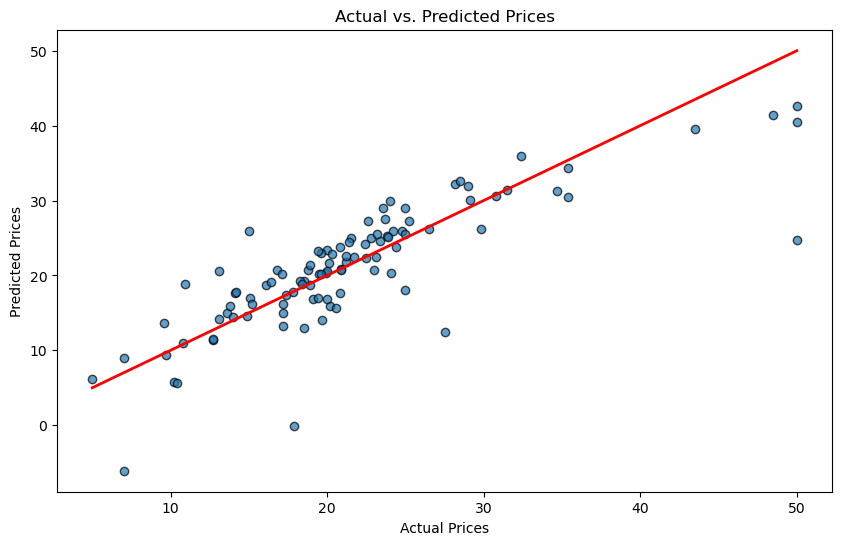

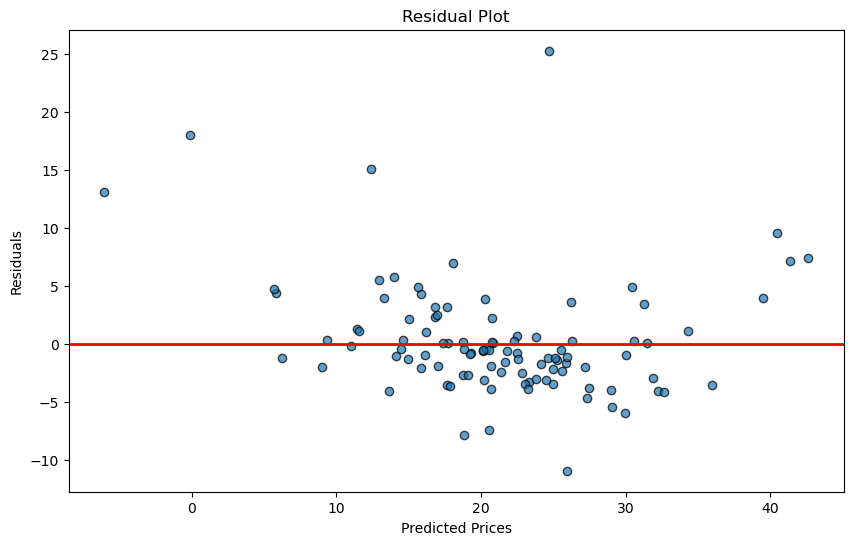

In [20]:
# Evaluate the linear regression model using plots

# Plot actual vs. predicted prices
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred_lm, edgecolor = 'k', alpha = 0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linewidth = 2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

# Residual plot
plt.figure(figsize = (10, 6))
residuals = y_test - y_pred_lm
plt.scatter(y_pred_lm, residuals, edgecolor = 'k', alpha = 0.7)
plt.axhline(y = 0, color = 'red', linewidth = 2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [21]:
# Initialize the RandomForestRegressor model

## Boston dataset
print("Creating the model")
random_regression = RandomForestRegressor()

# Train the model
print("Fitting the model")
random_regression.fit(X_train, y_train)

# Display the model coefficients
print("Predicting using the X_test")
y_pred_rf = random_regression.predict(X_test)

Creating the model
Fitting the model
Predicting using the X_test


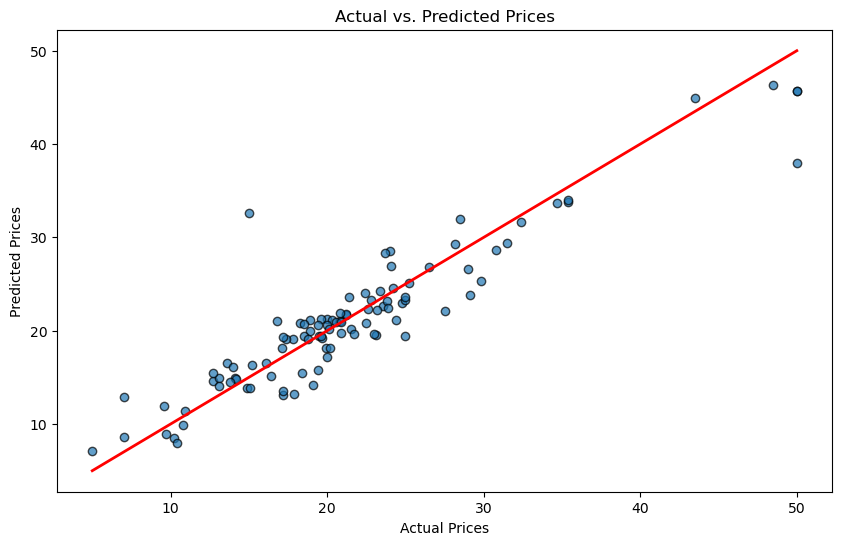

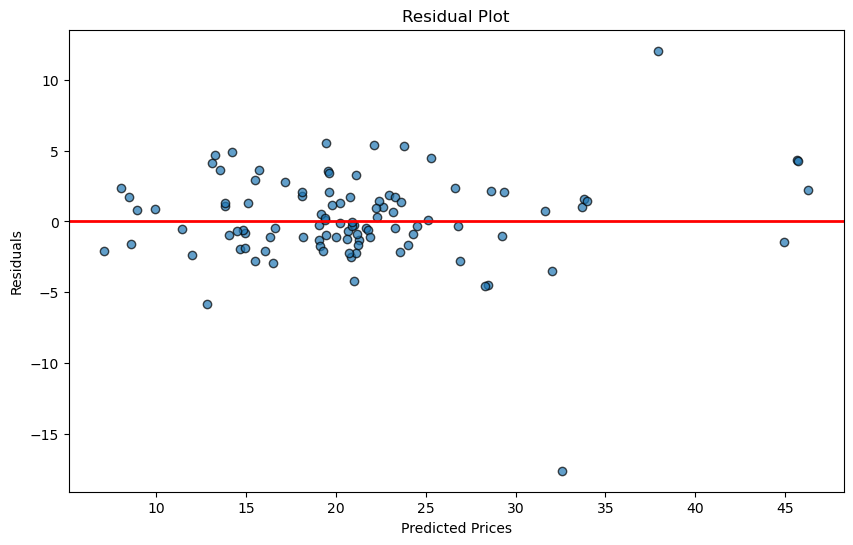

In [22]:
# Evaluate the Random Forest regression model using plots

# Plot actual vs. predicted prices
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred_rf, edgecolor = 'k', alpha = 0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linewidth = 2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

# Residual plot
plt.figure(figsize = (10, 6))
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals, edgecolor = 'k', alpha = 0.7)
plt.axhline(y = 0, color = 'red', linewidth = 2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

<h2>Phase Five : Model Evaluation</h2>

In [23]:
print("Performance Metrics for Linear Regression Model \n","--"*25)
print(f"Linear Model R2 Score : {r2_score(y_test, y_pred_lm)}")
print(f"Mean Absolute Error (MAE) : {mean_absolute_error(y_test, y_pred_lm)}")
print(f"Mean Squared Error (MSE) : {mean_squared_error(y_test, y_pred_lm)}")
print(f"Root Mean Squared Error (RMSE) : {math.sqrt(mean_squared_error(y_test, y_pred_lm))}")

Performance Metrics for Linear Regression Model 
 --------------------------------------------------
Linear Model R2 Score : 0.6621778035717667
Mean Absolute Error (MAE) : 3.2415112630255267
Mean Squared Error (MSE) : 24.77377969961209
Root Mean Squared Error (RMSE) : 4.977326561479776


In [24]:
print("Performance Metrics for Random Forest Regressor Model \n","--"*25)
print(f"Linear Model R2 Score : {r2_score(y_test, y_pred_rf)}")
print(f"Mean Absolute Error (MAE) : {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Mean Squared Error (MSE) : {mean_squared_error(y_test, y_pred_rf)}")
print(f"Root Mean Squared Error (RMSE) : {math.sqrt(mean_squared_error(y_test, y_pred_rf))}")

Performance Metrics for Random Forest Regressor Model 
 --------------------------------------------------
Linear Model R2 Score : 0.8635511425928656
Mean Absolute Error (MAE) : 2.156705882352941
Mean Squared Error (MSE) : 10.006310921568623
Root Mean Squared Error (RMSE) : 3.1632753470996837


In [25]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2
}
joblib.dump(metrics, 'metrics.pkl')

['metrics.pkl']

<h3>Since we can observe that our 'Random Forest Regressor' model performs better than 'Linear Regression' model, we use that as our working model.

<h2>Phase Six : Model Based Prediction</h2>

<h3>The Below Code is for an Application developed using Streamlit

In [26]:
# Using joblib to store the random forest regression model to use in prediction.
joblib.dump(random_regression, 'random_forest_model.pkl')
print("File Created and Saved Sucessfully")

File Created and Saved Sucessfully


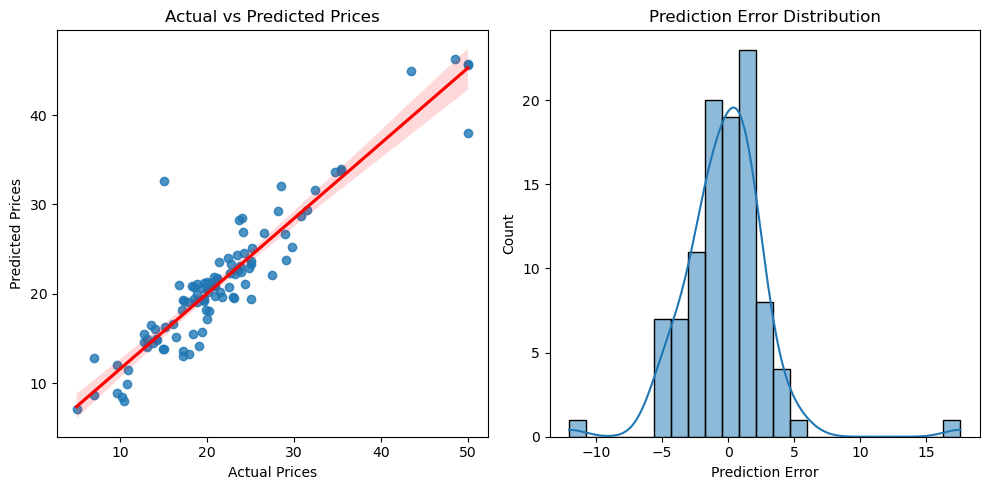

In [27]:
# Creating the plots for showing in our application
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
sns.regplot(x = y_test, y = y_pred_rf, line_kws = {"color": "red"})
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

plt.subplot(1, 2, 2)
error = y_pred_rf - y_test
sns.histplot(error, kde = True)
plt.xlabel('Prediction Error')
plt.title('Prediction Error Distribution')

plt.tight_layout()
plt.savefig('model_performance.png')

In [28]:
# Calculate min and max values for each feature in your dataset
feature_min_max = {
    'crim': (boston_df['crim'].min(), boston_df['crim'].max()),
    'zn': (boston_df['zn'].min(), boston_df['zn'].max()),
    'indus': (boston_df['indus'].min(), boston_df['indus'].max()),
    'chas': (boston_df['chas'].min(), boston_df['chas'].max()),
    'nox': (boston_df['nox'].min(), boston_df['nox'].max()),
    'rm': (boston_df['rm'].min(), boston_df['rm'].max()),
    'age': (boston_df['age'].min(), boston_df['age'].max()),
    'dis': (boston_df['dis'].min(), boston_df['dis'].max()),
    'rad': (boston_df['rad'].min(), boston_df['rad'].max()),
    'tax': (boston_df['tax'].min(), boston_df['tax'].max()),
    'ptratio': (boston_df['ptratio'].min(), boston_df['ptratio'].max()),
    'b': (boston_df['b'].min(), boston_df['b'].max()),
    'lstat': (boston_df['lstat'].min(), boston_df['lstat'].max())
}

# Save the feature min and max values
joblib.dump(feature_min_max, 'feature_min_max.pkl')

['feature_min_max.pkl']

In [29]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

# Load the trained model and feature min/max values
model = joblib.load('random_forest_model.pkl')
feature_min_max = joblib.load('feature_min_max.pkl')

st.set_page_config(page_title="Housing Price Prediction App", page_icon = ":house:",layout = "wide")

st.title('Boston Housing Price Prediction')

st.sidebar.header('Input Features')

# Function to get user input for prediction
def user_input_features():
    crim = st.sidebar.slider('crim', feature_min_max['crim'][0], feature_min_max['crim'][1], value=feature_min_max['crim'][0])
    zn = st.sidebar.slider('zn', feature_min_max['zn'][0], feature_min_max['zn'][1], value=feature_min_max['zn'][0])
    indus = st.sidebar.slider('indus', feature_min_max['indus'][0], feature_min_max['indus'][1], value=feature_min_max['indus'][0])
    chas = st.sidebar.selectbox('chas', [0, 1])
    nox = st.sidebar.slider('nox', feature_min_max['nox'][0], feature_min_max['nox'][1], value=feature_min_max['nox'][0])
    rm = st.sidebar.slider('rm', feature_min_max['rm'][0], feature_min_max['rm'][1], value=feature_min_max['rm'][0])
    age = st.sidebar.slider('age', feature_min_max['age'][0], feature_min_max['age'][1], value=feature_min_max['age'][0])
    dis = st.sidebar.slider('dis', feature_min_max['dis'][0], feature_min_max['dis'][1], value=feature_min_max['dis'][0])
    rad = st.sidebar.slider('rad', feature_min_max['rad'][0], feature_min_max['rad'][1], value=feature_min_max['rad'][0])
    tax = st.sidebar.slider('tax', feature_min_max['tax'][0], feature_min_max['tax'][1], value=feature_min_max['tax'][0])
    ptratio = st.sidebar.slider('ptratio', feature_min_max['ptratio'][0], feature_min_max['ptratio'][1], value=feature_min_max['ptratio'][0])
    b = st.sidebar.slider('b', feature_min_max['b'][0], feature_min_max['b'][1], value=feature_min_max['b'][0])
    lstat = st.sidebar.slider('lstat', feature_min_max['lstat'][0], feature_min_max['lstat'][1], value=feature_min_max['lstat'][0])
    
    data = {
        'crim': crim,
        'zn': zn,
        'indus': indus,
        'chas': chas,
        'nox': nox,
        'rm': rm,
        'age': age,
        'dis': dis,
        'rad': rad,
        'tax': tax,
        'ptratio': ptratio,
        'b': b,
        'lstat': lstat
    }
    
    features = np.array([list(data.values())])
    return features

input_df = user_input_features()

# Predict button
if st.sidebar.button('Predict'):
    # Make prediction
    prediction = model.predict(input_df)
    
    st.subheader('Prediction')
    st.write(f'The predicted median value of owner-occupied homes in $1000s is: {prediction[0]:.2f}')
    
# Display model performance metrics
st.subheader('Model Performance Metrics')
metrics = joblib.load('metrics.pkl')
st.write(f"Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
st.write(f"Mean Squared Error (MSE): {metrics['MSE']:.2f}")
st.write(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}")
st.write(f"R-squared (R2): {metrics['R2']:.2f}")

# Display model performance plots
st.subheader('Model Performance Plots')
st.image('model_performance.png')

Writing app.py


In [ ]:
# The running application can be stopped by cllicking on this cell and pressing "I + I" or stopping the kernel of the ipynb file.
!streamlit run app.py